<a href="https://colab.research.google.com/github/yasservision24/Breast-Tumor-classification-as-Benign-or-Malignant-using-deeplearning/blob/main/BREAST_CANCER_DETECTION_MODEL_USING_DATA_AND_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
features_data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
features_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
labels_data=dataset.target
print(labels_data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
unique, counts = np.unique(labels_data, return_counts=True)

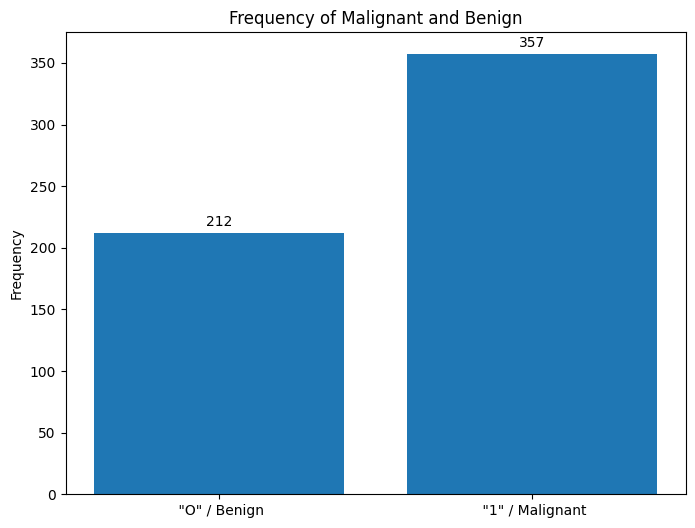

In [ ]:
plt.figure(figsize=(8, 6))
bars=plt.bar(unique, counts)
plt.title('Frequency of Malignant and Benign')
x_labels = [' "O" / Benign', ' "1" / Malignant']
plt.ylabel('Frequency')
plt.xticks(unique, x_labels)
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()


In [ ]:
combined_data = np.c_[dataset.data, dataset.target]

In [ ]:
features_n_labels = list(dataset.feature_names) + ['target']
data_f = pd.DataFrame(combined_data, columns=features_n_labels)
display(data_f.head(15))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0.0


In [ ]:
display(data_f.tail(15))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,1.0
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,1.0
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,1.0
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,...,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,1.0
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1.0
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1.0
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1.0
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1.0
562,15.220,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,0.0
563,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,0.0


In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data_f.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
data_f.isnull().sum().sum()

0

In [ ]:
data_f['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features_data,labels_data, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [ ]:
from tensorflow import keras

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [ ]:

import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras

In [ ]:


model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.9940 - accuracy: 0.2567 - val_loss: 0.7802 - val_accuracy: 0.3696
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.5892 - val_loss: 0.5080 - val_accuracy: 0.7609
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4655 - accuracy: 0.8191 - val_loss: 0.3702 - val_accuracy: 0.8696
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3615 - accuracy: 0.8729 - val_loss: 0.2925 - val_accuracy: 0.9130
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2957 - accuracy: 0.9071 - val_loss: 0.2443 - val_accuracy: 0.9348
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.9144 - val_loss: 0.2105 - val_accuracy: 0.9348
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2176 - accuracy: 0.9291 - val_loss: 0.1863 - val_accuracy: 0.9565
Epoch 8/100


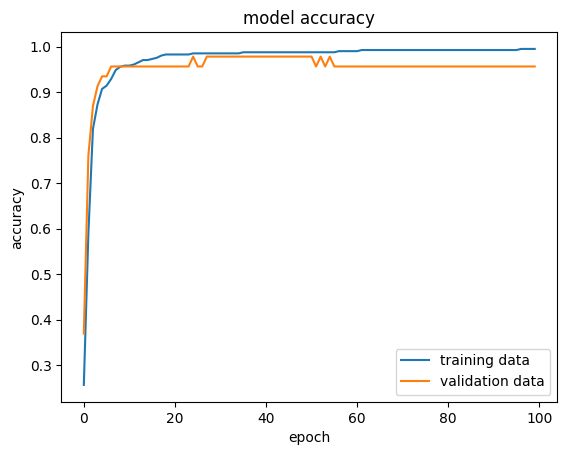

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

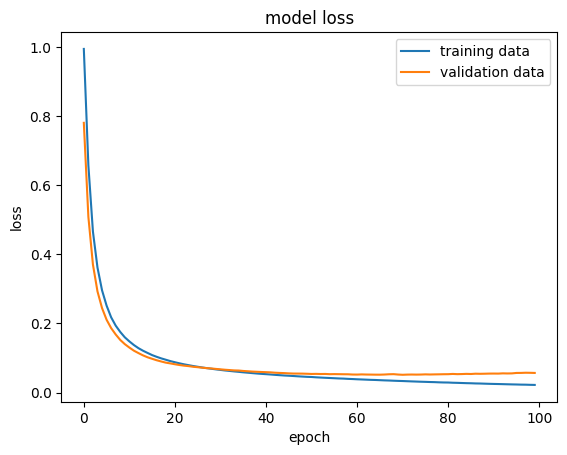

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.9561
0.9561403393745422


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
# (probability of being Bening,probability of being Malignant)
l=[0.25,0.56]
max=np.argmax(l)
print(l)
print(max)

[0.25, 0.56]
1


USING THE MODEL FOR PREDICTION


In [ ]:
# here we are providing the features to the model to get the output label
# imp point to keep in mind, as we are providing the input as array it is must be in sequnce with the features of dataframe


input = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

input_array = np.asarray(input)

input_data_reshaped = input_array.reshape(1,-1)
input_data_std = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)
prediction_label = [np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0] == 0):
  print('The tumor is Malignant')
else:
  print('The tumor is Benign')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 154ms/step
[[0.02484936 0.9821793 ]]
[1]
The tumor is Benign
